<h1><center><b>Machine Learning</b></center></h1>
<h3><center>Exercise 6</center></h3>
<h4><center>K-Means and PCA<center></h4>

*Your* Name:  
<font color='red'>
Osher Elhadad, 318969748
</font>


**Instructions:**
- Create a copy of this notebook and implement your code in it.
- Make sure you don't leave empty cells or empty answers.
- You should not change the code we provided you.
- When you finish the assignment, download this ***notebook*** and ***predictions.txt*** and submit it to the [**"submit"**](https://submit.cs.biu.ac.il/cgi-bin/welcome.cgi) system. 
To Download the notebook go to **"File"** -> **"Download .ipynb"**.  
- Submit deadline: 18/1/2023

## Part 1 - K-Means (50%)

In this part you will have to implement the K-Means algorithm that was learned in class.<br>
**The implementation will be based on the numpy package only.**

### **1. Useful packages**

In [43]:
import matplotlib.pyplot as plt
import numpy as np


### **2. Data**

Generate a 2D dataset

In [44]:
## Generate 2D data 
X = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffle the data
np.random.shuffle(X)

print(X.shape)

(2000, 2)


Plot the data to explore how many clusters it contains

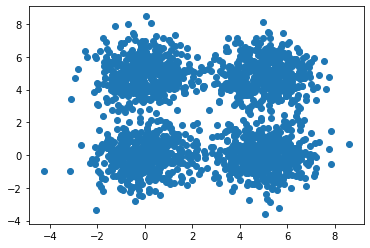

In [45]:
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')
plt.show()

### **3. K-Means**

Implement the algorithm

In [46]:
class KMeans():
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        
        ######## Helper fields #########
        self.X_fit_ = None      # Here you should store the dataset X. 
                                # This can be useful for the next tasks.
        
        self.labels_ = None     # Here you should store the final labels. 
                                # That is, the clusters indices for all the samples

        self.centroids = None   # Here you should store the final centroids.

        self.labels_history = []    # Here you should store the labels of each iteration.
                                    # This can also be useful later.
        
        self.centroids_history = [] # Here you should store the centroids of each iteration.
                                    # This can also be useful later.

        self.costs = []             # Here you should store the costs of the iterations.
                                    # That is, you should calculate the cost in every iteration
                                    # and store it in this list.


    def fit(self, X):
        self.X_fit_ = X

        # Choose random centroid as first
        self.centroids = np.random.uniform(low=self.X_fit_.min(), high=self.X_fit_.max(), size=(self.n_clusters, self.X_fit_.shape[1]))

        stop = False
        
        # Learn until max iterations or convergence
        for i in range(self.max_iter):

          # Get labels to all self.X_fit_ samples with current centroids
          labels = self._get_labels(self.X_fit_)
            
          # Save labels, centroids and costs history
          self.labels_history.append(labels)
          self.centroids_history.append(self.centroids)
          self.costs.append(self._calculate_cost(self.X_fit_))

          # If convergenced last iterration then break
          if stop:
            break

          # Generate new centoids and save the old centoids
          old_centroids = self.centroids
          self.centroids = self._get_centroids(self.X_fit_, labels)

          # Check for convergence (with epsilon)
          if np.allclose(old_centroids, self.centroids, rtol=1e-06, atol=1e-06):
            stop = True
            
        # Save final labels and centroids
        self.labels_ = labels
        self.centroids = self._get_centroids(self.X_fit_, labels)


    def predict(self, X):
        return self._get_labels(X)


    def _get_distances(self, X):

        # Check if there are centroids, if not generate randomly
        if self.centroids is None:
          self.centroids = np.random.uniform(low=X.min(), high=X.max(), size=(self.n_clusters, X.shape[1]))
        
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i in range(len(self.centroids)):

          # Calculate distances using euclidean distance
          distances[:, i] = np.linalg.norm(X - self.centroids[i], axis=1)
      
        return distances

  
    def _get_labels(self, X):

        # Assign every sample to the closest centroid as a label
        return np.argmin(self._get_distances(X), axis=1)


    def _get_centroids(self, X, labels):

        # Generate new centroids by the mean of every old centroid
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))

        for i in range(self.n_clusters):
          if len(X[labels == i]) == 0:
            new_centroids[i] = self.centroids[i]
          else:
            new_centroids[i] = X[labels == i].mean(axis=0)
        return new_centroids

    
    def _calculate_cost(self, X):

        # calculate the sum of the square minimum (centroid-sample) distances
        return np.sum(np.min(self._get_distances(X), axis=1) ** 2)



Run the algorithm on the 2D dataset

In [47]:
n_clusters = 4 
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

Plot a graph of the costs as a function of the iterations

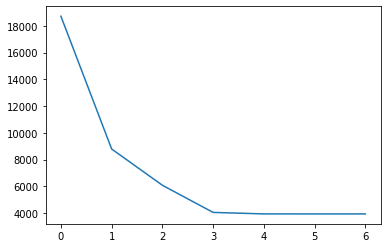

In [48]:
costs = kmeans.costs
plt.plot(costs)
plt.show()

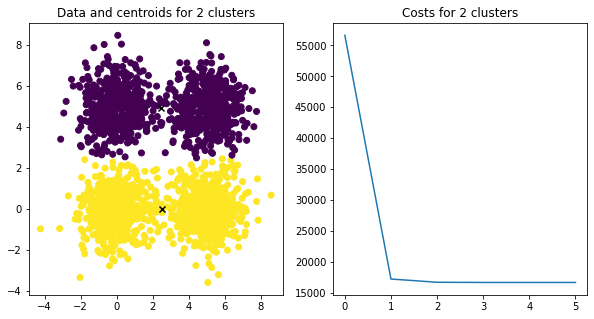

Final cost for: 2 is:16718.29346630352


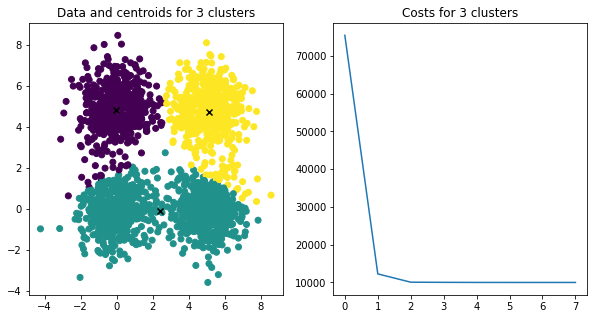

Final cost for: 3 is:9982.26749199868


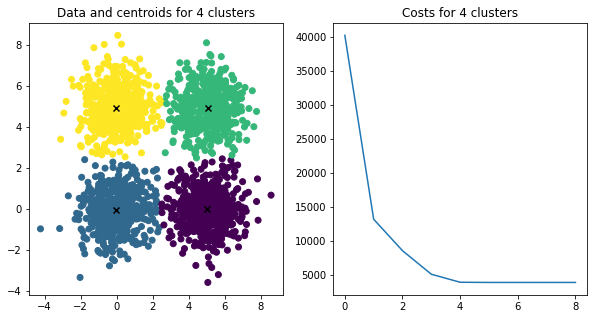

Final cost for: 4 is:3943.0562327057983


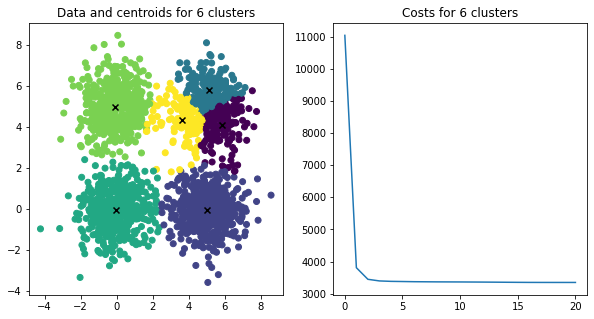

Final cost for: 6 is:3352.054592218521


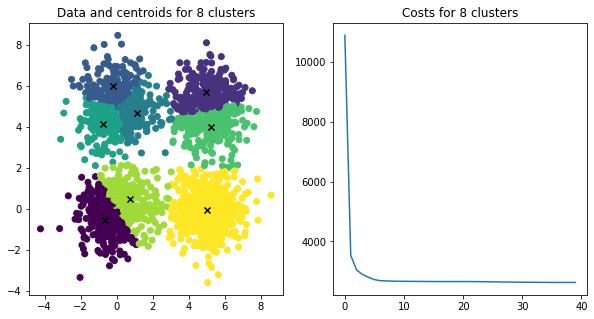

Final cost for: 8 is:2633.386320340732


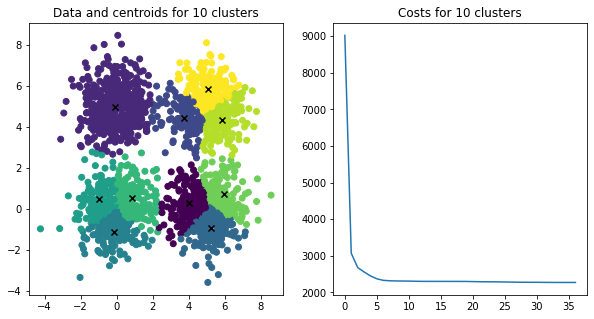

Final cost for: 10 is:2272.477656384208


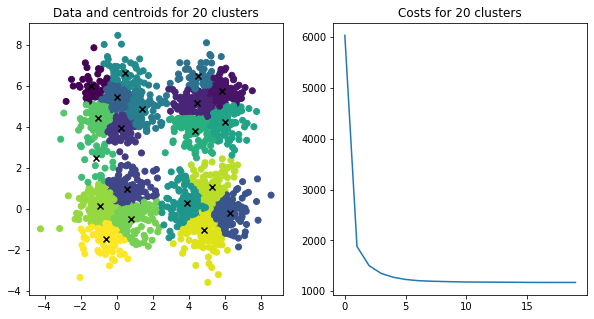

Final cost for: 20 is:1170.5333503236734


In [49]:
clusters_nums = [2, 3, 4, 6, 8, 10, 20] 

# Show for every cluster it's data and centroids and it's costs graphs
for cluster_num in clusters_nums:
  new_kmeans = KMeans(n_clusters=cluster_num)
  new_kmeans.fit(X)
  costs = new_kmeans.costs

  fig, (plot_data, plot_cost) = plt.subplots(1, 2, figsize=(10, 5))

  # Show Data and centroids in one plot
  plot_data.scatter(X[:, 0], X[:, 1], cmap='viridis', c=new_kmeans.labels_)
  plot_data.scatter(new_kmeans.centroids[:, 0], new_kmeans.centroids[:, 1], c='black', marker='x')
  plot_data.set_title("Data and centroids for " + str(cluster_num) + " clusters")

  # Show all costs graph
  plot_cost.plot(costs)
  plot_cost.set_title("Costs for " + str(cluster_num) + " clusters")

  plt.show()

  # Print the final cost
  print("Final cost for: " + str(cluster_num) + " is:" + str(new_kmeans.costs[-1]))

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

2 clusters: 16718.29346630352<br>
3 clusters: 9982.26749199868<br>
4 clusters: 3943.0562327057983<br>
6 clusters: 3352.054592218521<br>
8 clusters: 2633.386320340732<br>
10 clusters: 2272.477656384208<br>
20 clusters: 1170.5333503236734<br>

Now write a code that plots the clusters and the locations of the centroids at each iteration

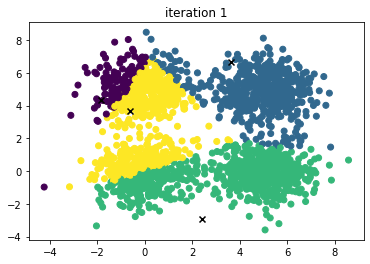

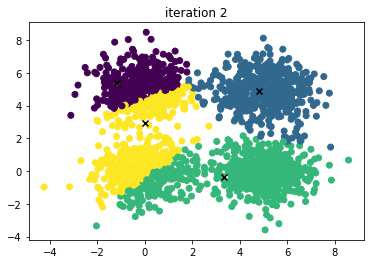

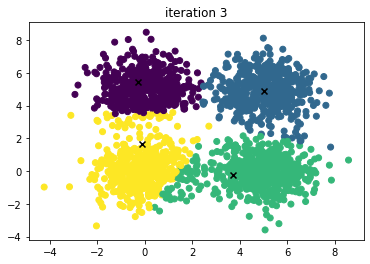

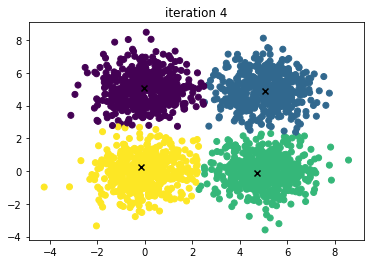

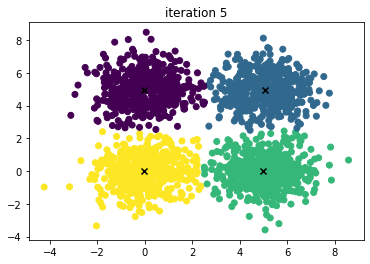

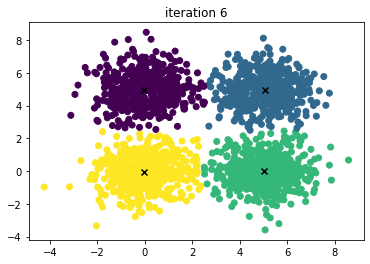

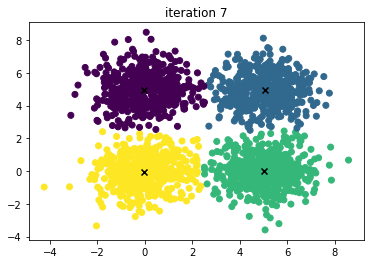

In [50]:
# Go over the centroid history and show them in every iteration
for i, centroids in enumerate(kmeans.centroids_history):
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis', c=kmeans.labels_history[i])
  plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x')
  plt.title("iteration " + str(i+1))
  plt.show()

## Part 2 - PCA (50%)

In this part you will implement the PCA algorithm on the MNIST dataset.<br>
**As in the first part, your implementation will be based on the numpy package only.**

### **1. Useful packages**

In [67]:
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.datasets import fetch_openml

### **2. Data**

Load the MNIST dataset from sklearn datasets.

In [68]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

### **3. PCA**

Implement the PCA algorithm here.<br> Don't forget to center the data, i.e. make the mean of the columns of the dataset to 0.

In [69]:
import numpy as np

class PCA:
    def __init__(self):
        self.V = None

    def fit(self, X):

        # Center the data- make the mean of the columns of the dataset to 0
        X = X - np.mean(X, axis=0)

        # Calculate the correlation matrix = X^TX
        correlation_matrix = np.matmul(X.T, X)

        # Compute the eigenvalues and eigenvectors of the correlation matrix
        eigenvalues, eigenvectors = np.linalg.eigh(correlation_matrix)

        # Sort the eigenvectors in decreasing order
        idx = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:,idx]
        self.V = eigenvectors
        return self.V

    def transform(self, X, n_dimentions):

        # Center the data- make the mean of the columns of the dataset to 0
        X = X - np.mean(X, axis=0)

        # Encode the sample to n_dimentions
        X_reduced = np.matmul(X, self.V[:,:n_dimentions]).T

        return X_reduced



Run the algorithm on MNIST dataset.

In [70]:
pca = PCA()
V = pca.fit(X)

# transform the data to the top 2 principal components
X_reduced = pca.transform(X, 2).T


Plot the data in the top 2 principal component space.

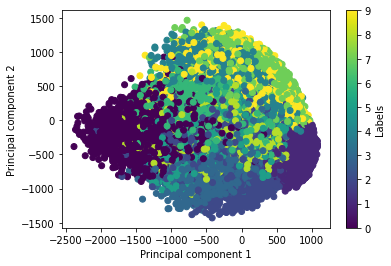

In [71]:
y = [int(label) for label in y]
fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')

plt.show()

As we showed in class, $V\in \mathbb{R}^{d\times r}$  is the matrix whose colmns are the top  $r$ eigenvectors of $X^TX$. That is, the eigenvectors that correspond to the  $r$ largest eigenvalues. <br>
In the cell below, Write a code that plots the two matrices $V^TV$ and $VV^T$.<br>
Explain the differences between the two matrices

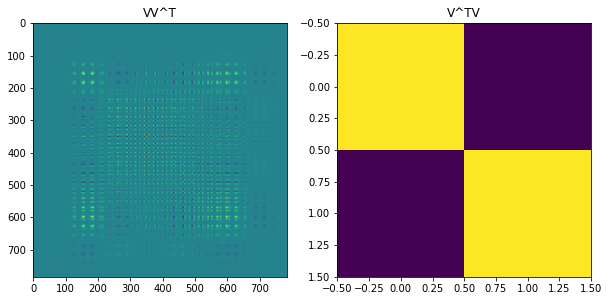

VV^T shape: (784, 784)
V^TV shape: (2, 2)


In [72]:
new_V = V[:, :2]

VTV = np.matmul(new_V.T, new_V)
VVT = np.matmul(new_V, new_V.T)

# Plot VV^T and V^TV images
fig, (img_VVT, img_VTV) = plt.subplots(1, 2, figsize=(10, 5))
img_VVT.set_title("VV^T")
img_VVT.imshow(VVT)
img_VTV.set_title("V^TV")
img_VTV.imshow(VTV)

plt.show()

print("VV^T shape: " + str(VVT.shape))
print("V^TV shape: " + str(VTV.shape))

Your Explanation:
The matrix $V · V^T$ is the multipication of the matrix $V$ and its transpose $V^T$, while $V^T · V$ is the multipication of the transpose $V^T$ and the matrix $V$. The first difference between these two matrices is their order.

The matrix $V$ is $V\in \mathbb{R}^{d\times r}$, where $d$ is the number of rows and $r$ is the number of columns. While $V^T$ is a $V^T\in \mathbb{R}^{r\times d}$. When we multiply $V · V^T$, we get a ${d\times d}$ matrix, and when we multiply $V^T · V$, we get a ${r\times r}$ matrix.

Both $V · V^T$ and $V^T · V$ are orthogonal matrices, it means that their columns are orthonormal. This is because the columns of $V$ are orthonormal.

$V$ is the matrix of the top $r$ eigenvectors of the data matrix $X^T · X$, and $V · V^T$ is used to project the sample to r dimentional space, and recontsturct the sample to the original space. It means to project the data onto the lower-dimensional space defined by the top $r$ eigenvectors of $X$ and back to the higher-dimensional space, this is by multiply a sample $x\in \mathbb{R}^{d\times 1}$ first by $V^T · x\in \mathbb{R}^{r\times 1}$ (lower-dimensional space) and then multiply it by $V$, so we get $V · V^T · x\in \mathbb{R}^{d\times 1}$ (back to the higher-dimensional space). By this we encode the data to lower-dimensional space $r$ and then we decode it to the higher-dimensional space $d$ and try to bring it as closest as posible to the original sample. 

The matrix $V^T · V$ is the identity matrix, $V^T · V = I^{r\times r}$ as we saw in class because in PCA we try to find a subspace such that, projecting to it leads to little distortion- $$\min_{V} \sum_{i=1}^{N} ||VV^T x_i - x_i||_2^2 \quad \text{s.t.} \quad V^TV = I$$

Now write a function that projects a sample to a n-dimentional space  and **recontsturct** it to the original space.

In [73]:
def pca_reconstruction(x, n_dimentions):

    # Project the sample to the n-dimensional space
    x_projected = np.matmul(x, V[:,:n_dimentions])

    # Reconstruct the sample to the original space
    x_reconstructed = np.matmul(x_projected, V[:,:n_dimentions].T)
    return x_reconstructed

Now write code that samples a random image from the dataset, and uses the function above to project it into n-dimensional space and reconstruct it to the original space. <br><br>
Is the reconstructed image similar the original image?
<br>For 100 dimension space reconstaction yes, but for 3 and 10 it looks less like the real image<br>

Perform the reconstruction above from spaces of dimensions: 3, 10, 100.<br>


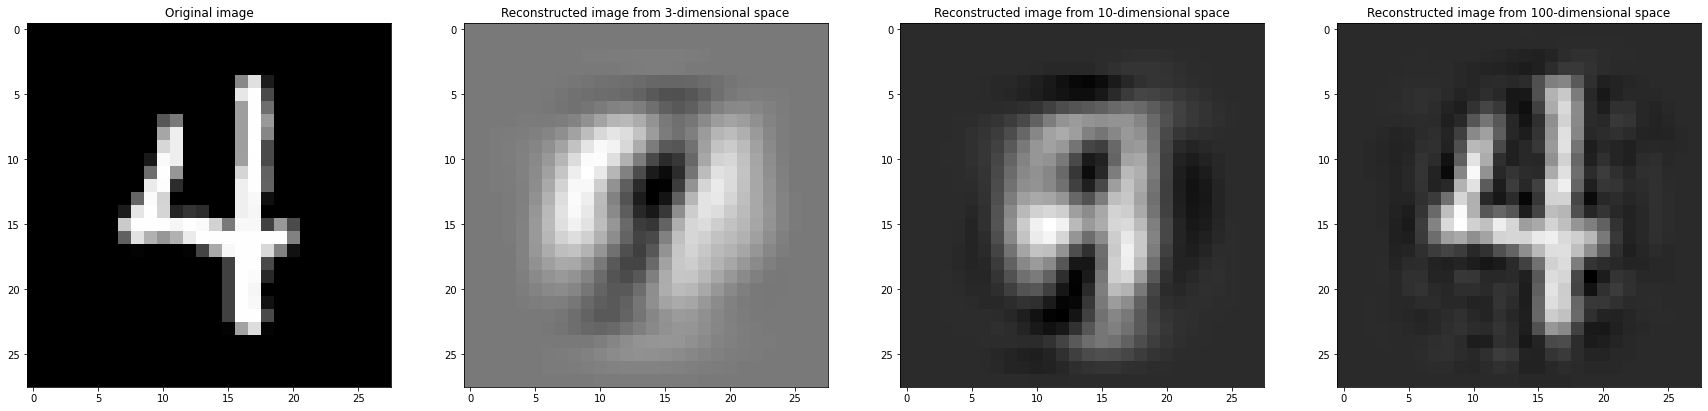

In [74]:
# Choose a random image
random_x = X[np.random.choice(len(X))]

# Project and reconstruct the image in 3-dimensional space
reconstructed_from_3d = pca_reconstruction(random_x, 3).reshape(28, 28)

# Project and reconstruct the image in 10-dimensional space
reconstructed_from_10d = pca_reconstruction(random_x, 10).reshape(28, 28)

# Project and reconstruct the image in 100-dimensional space
reconstructed_from_100d = pca_reconstruction(random_x, 100).reshape(28, 28)

# Plot the original and reconstructed images
fig, (img_orig, img_3d, img_10d, img_100d) = plt.subplots(1, 4, figsize=(30, 15))
img_orig.set_title("Original image")
img_orig.imshow(random_x.reshape(28, 28), cmap='gray')
img_3d.set_title("Reconstructed image from 3-dimensional space")
img_3d.imshow(reconstructed_from_3d, cmap='gray')
img_10d.set_title("Reconstructed image from 10-dimensional space")
img_10d.imshow(reconstructed_from_10d, cmap='gray')
img_100d.set_title("Reconstructed image from 100-dimensional space")
img_100d.imshow(reconstructed_from_100d, cmap='gray')

plt.show()